In [51]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

In [97]:
N = 1000
gamma = 2
alpha = 1 / (gamma - 1)
mean_degree = 5
num_edges = int(mean_degree * N / 2)
alpha, num_edges

(1.0, 2500)

In [98]:
G = nx.Graph()
G.add_nodes_from(range(N))

In [99]:
weights = np.arange(1, N + 1)**-alpha
weights /= weights.sum()
weights.sum()

1.0

In [100]:
for _ in range(num_edges):
    while True:
        i = np.random.choice(range(N), p=weights)
        j = np.random.choice(range(N), p=weights)
        if i == j or i in G.neighbors(j):
            continue
        G.add_edge(i, j)
        break

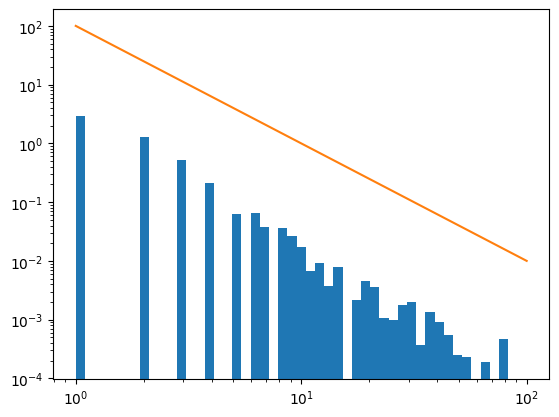

In [101]:
degrees = [d for _, d in G.degree]
mean_degree = np.mean(degrees)
_, bins, _ = plt.hist(degrees, bins=np.logspace(0, 2), density=True, log=True)
plt.plot(bins, 100 / bins**gamma)
plt.xscale('log')
plt.yscale('log')